# Preparar ambiente

In [1]:
!pip install pandas scikit-learn matplotlib

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Informações do dataset

In [3]:
# Contando o número de linhas em cada arquivo CSV
!wc -l dados/*.csv

   1745673 dados/INFLUD21-26-06-2025.csv
    560578 dados/INFLUD22-26-06-2025.csv
    279454 dados/INFLUD23-26-06-2025.csv
    267985 dados/INFLUD24-26-06-2025.csv
   2853690 total


In [4]:
# Observando as colunas disponíveis e verificando se os CSVs possuem as mesmas colunas
!head -n 1 dados/*.csv | sort | uniq

# O significado de cada coluna pode ser encontrado aqui:
# https://opendatasus.saude.gov.br/dataset/srag-2021-a-2024/resource/3135ac9c-2019-4989-a893-2ed50ebd8e68


==> dados/INFLUD21-26-06-2025.csv <==
==> dados/INFLUD22-26-06-2025.csv <==
==> dados/INFLUD23-26-06-2025.csv <==
==> dados/INFLUD24-26-06-2025.csv <==
"NU_NOTIFIC";"DT_NOTIFIC";"SEM_NOT";"DT_SIN_PRI";"SEM_PRI";"SG_UF_NOT";"ID_REGIONA";"CO_REGIONA";"ID_MUNICIP";"CO_MUN_NOT";"CS_SEXO";"DT_NASC";"NU_IDADE_N";"TP_IDADE";"COD_IDADE";"CS_GESTANT";"CS_RACA";"CS_ETINIA";"CS_ESCOL_N";"ID_PAIS";"CO_PAIS";"SG_UF";"ID_RG_RESI";"CO_RG_RESI";"ID_MN_RESI";"CO_MUN_RES";"CS_ZONA";"NOSOCOMIAL";"AVE_SUINO";"FEBRE";"TOSSE";"GARGANTA";"DISPNEIA";"DESC_RESP";"SATURACAO";"DIARREIA";"VOMITO";"OUTRO_SIN";"OUTRO_DES";"FATOR_RISC";"PUERPERA";"CARDIOPATI";"HEMATOLOGI";"SIND_DOWN";"HEPATICA";"ASMA";"DIABETES";"NEUROLOGIC";"PNEUMOPATI";"IMUNODEPRE";"RENAL";"OBESIDADE";"OBES_IMC";"OUT_MORBI";"MORB_DESC";"TABAG";"VACINA";"DT_UT_DOSE";"MAE_VAC";"DT_VAC_MAE";"M_AMAMENTA";"DT_DOSEUNI";"DT_1_DOSE";"DT_2_DOSE";"ANTIVIRAL";"TP_ANTIVIR";"OUT_ANTIV";"DT_ANTIVIR";"HOSPITAL";"DT_INTERNA";"SG_UF_INTE";"ID_RG_INTE";"CO_RG_INTE

In [ ]:
# Ler os arquivos CSV completos resultaria em OOM. Esta utilidade permite selecionar as colunas desejadas:
cols = ["NU_NOTIFIC", "DT_NOTIFIC", "SEM_NOT", "DT_SIN_PRI", "SEM_PRI", "SG_UF_NOT", "ID_REGIONA", "CO_REGIONA", "ID_MUNICIP", "CO_MUN_NOT", "CS_SEXO", "DT_NASC", "NU_IDADE_N", "TP_IDADE", "COD_IDADE", "CS_GESTANT", "CS_RACA", "CS_ETINIA", "CS_ESCOL_N", "ID_PAIS", "CO_PAIS", "SG_UF", "ID_RG_RESI", "CO_RG_RESI", "ID_MN_RESI", "CO_MUN_RES", "CS_ZONA", "NOSOCOMIAL", "AVE_SUINO", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "OUTRO_SIN", "OUTRO_DES", "FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "OBES_IMC", "OUT_MORBI", "MORB_DESC", "TABAG", "VACINA", "DT_UT_DOSE", "MAE_VAC", "DT_VAC_MAE", "M_AMAMENTA", "DT_DOSEUNI", "DT_1_DOSE", "DT_2_DOSE", "ANTIVIRAL", "TP_ANTIVIR", "OUT_ANTIV", "DT_ANTIVIR", "HOSPITAL", "DT_INTERNA", "SG_UF_INTE", "ID_RG_INTE", "CO_RG_INTE", "ID_MN_INTE", "CO_MU_INTE", "NM_UN_INTE", "UTI", "DT_ENTUTI", "DT_SAIDUTI", "SUPORT_VEN", "RAIOX_RES", "RAIOX_OUT", "DT_RAIOX", "AMOSTRA", "DT_COLETA", "TP_AMOSTRA", "OUT_AMOST", "PCR_RESUL", "DT_PCR", "POS_PCRFLU", "TP_FLU_PCR", "PCR_FLUASU", "FLUASU_OUT", "PCR_FLUBLI", "FLUBLI_OUT", "POS_PCROUT", "PCR_VSR", "PCR_PARA1", "PCR_PARA2", "PCR_PARA3", "PCR_PARA4", "PCR_ADENO", "PCR_METAP", "PCR_BOCA", "PCR_RINO", "PCR_OUTRO", "DS_PCR_OUT", "CLASSI_FIN", "CLASSI_OUT", "CRITERIO", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA", "DT_DIGITA", "HISTO_VGM", "PAIS_VGM", "CO_PS_VGM", "LO_PS_VGM", "DT_VGM", "DT_RT_VGM", "PCR_SARS2", "PAC_COCBO", "PAC_DSCBO", "OUT_ANIM", "DOR_ABD", "FADIGA", "PERD_OLFT", "PERD_PALA", "TOMO_RES", "TOMO_OUT", "DT_TOMO", "TP_TES_AN", "DT_RES_AN", "RES_AN", "POS_AN_FLU", "TP_FLU_AN", "POS_AN_OUT", "AN_SARS2", "AN_VSR", "AN_PARA1", "AN_PARA2", "AN_PARA3", "AN_ADENO", "AN_OUTRO", "DS_AN_OUT", "TP_AM_SOR", "SOR_OUT", "DT_CO_SOR", "TP_SOR", "OUT_SOR", "DT_RES", "RES_IGG", "RES_IGM", "RES_IGA", "POV_CT", "TP_POV_CT", "TEM_CPF", "ESTRANG", "VACINA_COV", "DOSE_1_COV", "DOSE_2_COV", "DOSE_REF", "DOSE_2REF", "DOSE_ADIC", "DOS_RE_BI", "FAB_COV_1", "FAB_COV_2", "FAB_COVRF", "FAB_COVRF2", "FAB_ADIC", "FAB_RE_BI", "LOTE_1_COV", "LOTE_2_COV", "LOTE_REF", "LOTE_REF2", "LOTE_ADIC", "LOT_RE_BI", "FNT_IN_COV", "TRAT_COV", "TIPO_TRAT", "DT_TRT_COV", "OUT_TRAT", "SURTO_SG", "CO_DETEC", "VG_OMS", "VG_OMSOUT", "VG_LIN", "VG_MET", "VG_METOUT", "VG_DTRES", "VG_ENC", "VG_REINF", "VG_CODEST", "REINF"]
def read_selected_columns(selected_cols: list[str]):
    datasets = []
    for file in os.listdir('dados'):
        if file.endswith('.csv') and file.startswith('INFLUD'):
            print(f"Lendo arquivo: {file}")
            df = pd.read_csv(f'dados/{file}', sep=';', usecols=selected_cols)
            # print(df.head())
            datasets.append(df)
    return pd.concat(datasets, ignore_index=True)

# Informações Gerais

In [6]:
# wanted_cols = ["NU_NOTIFIC", "DT_NOTIFIC", "DT_SIN_PRI", "SG_UF_NOT", "ID_REGIONA", "ID_MUNICIP", "CS_SEXO", "DT_NASC", "CS_GESTANT", "CS_RACA", "CS_ESCOL_N", "ID_PAIS", "SG_UF", "ID_RG_RESI", "ID_MN_RESI", "NOSOCOMIAL", "AVE_SUINO", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO", "OUTRO_SIN", "OUTRO_DES", "FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "OBES_IMC", "OUT_MORBI", "MORB_DESC", "TABAG", "VACINA", "DT_UT_DOSE", "MAE_VAC", "DT_VAC_MAE", "M_AMAMENTA", "DT_DOSEUNI", "DT_1_DOSE", "DT_2_DOSE", "ANTIVIRAL", "TP_ANTIVIR", "OUT_ANTIV", "DT_ANTIVIR", "HOSPITAL", "DT_INTERNA", "SG_UF_INTE", "ID_RG_INTE", "CO_RG_INTE", "ID_MN_INTE", "CO_MU_INTE", "NM_UN_INTE", "UTI", "DT_ENTUTI", "DT_SAIDUTI", "SUPORT_VEN", "RAIOX_RES", "RAIOX_OUT", "DT_RAIOX", "AMOSTRA", "DT_COLETA", "TP_AMOSTRA", "OUT_AMOST", "PCR_RESUL", "DT_PCR", "POS_PCRFLU", "TP_FLU_PCR", "PCR_FLUASU", "FLUASU_OUT", "PCR_FLUBLI", "FLUBLI_OUT", "POS_PCROUT", "PCR_VSR", "PCR_PARA1", "PCR_PARA2", "PCR_PARA3", "PCR_PARA4", "PCR_ADENO", "PCR_METAP", "PCR_BOCA", "PCR_RINO", "PCR_OUTRO", "DS_PCR_OUT", "CLASSI_FIN", "CLASSI_OUT", "CRITERIO", "EVOLUCAO", "DT_EVOLUCA", "DT_ENCERRA", "DT_DIGITA", "HISTO_VGM", "PAIS_VGM", "CO_PS_VGM", "LO_PS_VGM", "DT_VGM", "DT_RT_VGM", "PCR_SARS2", "PAC_COCBO", "PAC_DSCBO", "OUT_ANIM", "DOR_ABD", "FADIGA", "PERD_OLFT", "PERD_PALA", "TOMO_RES", "TOMO_OUT", "DT_TOMO", "TP_TES_AN", "DT_RES_AN", "RES_AN", "POS_AN_FLU", "TP_FLU_AN", "POS_AN_OUT", "AN_SARS2", "AN_VSR", "AN_PARA1", "AN_PARA2", "AN_PARA3", "AN_ADENO", "AN_OUTRO", "DS_AN_OUT", "TP_AM_SOR", "SOR_OUT", "DT_CO_SOR", "TP_SOR", "OUT_SOR", "DT_RES", "RES_IGG", "RES_IGM", "RES_IGA", "POV_CT", "TP_POV_CT", "TEM_CPF", "ESTRANG", "VACINA_COV", "DOSE_1_COV", "DOSE_2_COV", "DOSE_REF", "DOSE_2REF", "DOSE_ADIC", "DOS_RE_BI", "FAB_COV_1", "FAB_COV_2", "FAB_COVRF", "FAB_COVRF2", "FAB_ADIC", "FAB_RE_BI", "LOTE_1_COV", "LOTE_2_COV", "LOTE_REF", "LOTE_REF2", "LOTE_ADIC", "LOT_RE_BI", "FNT_IN_COV", "TRAT_COV", "TIPO_TRAT", "DT_TRT_COV", "OUT_TRAT", "SURTO_SG", "CO_DETEC", "VG_OMS", "VG_OMSOUT", "VG_LIN", "VG_MET", "VG_METOUT", "VG_DTRES", "VG_ENC", "VG_REINF", "VG_CODEST", "REINF"]
wanted_cols = ["DT_NOTIFIC", "DT_SIN_PRI", "SG_UF_NOT", "CS_SEXO", "NU_IDADE_N", "CS_RACA", "CS_ESCOL_N", "ID_PAIS", "SG_UF"]

df = read_selected_columns(wanted_cols)
df.head()

Lendo arquivo: INFLUD22-26-06-2025.csv
Lendo arquivo: INFLUD21-26-06-2025.csv
Lendo arquivo: INFLUD24-26-06-2025.csv
Lendo arquivo: INFLUD23-26-06-2025.csv


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2022-03-16,2022-03-16,RJ,M,82,1,9.0,BRASIL,RJ
1,2022-06-06,2022-06-04,SP,F,77,1,1.0,BRASIL,SP
2,2022-07-22,2022-07-15,SP,F,94,1,9.0,BRASIL,SP
3,2022-02-21,2022-02-20,CE,M,73,9,9.0,BRASIL,CE
4,2022-01-11,2022-01-08,CE,F,80,9,9.0,BRASIL,CE


## Limpando o dataframe

In [7]:
cleaned_df = df.copy()

# Linhas com valores NaN
cleaned_df[cleaned_df.isnull().any(axis=1)]

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
6,2022-01-25,2022-01-23,CE,F,97,9,NaN,BRASIL,CE
7,2022-01-29,2022-01-21,CE,F,76,9,NaN,BRASIL,CE
11,2022-01-20,2022-01-15,CE,F,83,9,NaN,BRASIL,CE
12,2022-06-16,2022-06-12,CE,M,87,9,NaN,BRASIL,CE
15,2022-02-09,2022-02-06,CE,M,81,9,NaN,BRASIL,CE
...,...,...,...,...,...,...,...,...,...
2853602,2024-01-03,2023-12-12,RJ,M,69,1,NaN,BRASIL,RJ
2853605,2023-10-05,2023-10-01,GO,M,67,3,NaN,BRASIL,GO
2853650,2023-12-21,2023-12-15,SP,M,0,4,NaN,BRASIL,SP
2853672,2023-03-07,2023-03-07,PB,M,76,4,NaN,BRASIL,PB


In [8]:
# Configurar o padrão para CS_ESCOL_N como 9 (ignorado)
cleaned_df['CS_ESCOL_N'] = cleaned_df['CS_ESCOL_N'].fillna(9)

cleaned_df[cleaned_df.isnull().any(axis=1)]

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
3532,2022-01-07,2022-01-06,NaN,F,60,4,1.0,BRASIL,RO
3990,2022-01-08,2022-01-08,NaN,M,74,4,9.0,BRASIL,RO
6212,2022-01-10,2022-01-05,NaN,F,89,1,0.0,BRASIL,MT
10932,2022-01-07,2022-01-07,NaN,F,59,1,4.0,BRASIL,RJ
12695,2022-01-07,2022-01-03,MS,F,81,4,9.0,BOLIVIA,NaN
...,...,...,...,...,...,...,...,...,...
2834389,2023-12-07,2023-12-06,PR,F,7,1,9.0,VENEZUELA,NaN
2834845,2023-12-08,2023-11-30,PR,M,83,1,9.0,PARAGUAI,NaN
2841650,2023-12-20,2023-12-17,PR,M,77,1,9.0,ARGENTINA,NaN
2841850,2023-11-13,2023-11-13,PA,M,55,1,9.0,UCRANIA,NaN


In [9]:
print("Número de linhas com SG_UF_NOT NaN:", cleaned_df['SG_UF_NOT'].isnull().sum())
print("Número de linhas com SG_UF NaN:", cleaned_df['SG_UF'].isnull().sum())
print("Número de linhas com SG_UF_NOT não NaN e SG_UF NaN:", (cleaned_df['SG_UF_NOT'].isnull() & cleaned_df['SG_UF'].notnull()).sum())

print("Linhas com SG_UF_NOT NaN e SG_UF NaN:")
cleaned_df[cleaned_df['SG_UF_NOT'].isnull() & cleaned_df['SG_UF'].isnull()]

Número de linhas com SG_UF_NOT NaN: 4750
Número de linhas com SG_UF NaN: 532
Número de linhas com SG_UF_NOT não NaN e SG_UF NaN: 4749
Linhas com SG_UF_NOT NaN e SG_UF NaN:


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
1676866,2021-06-25,2021-05-24,NaN,F,60,4,1.0,BOLIVIA,NaN


In [10]:
# As linhas com SG_UF_NOT NaN e SG_UF NaN serão descartadas
# As linhas onde SG_UF_NOT não é nulo e SG_UF é nulo serão preenchidas com SG_UF_NOT e vice-versa
cleaned_df['SG_UF'] = cleaned_df['SG_UF'].fillna(cleaned_df['SG_UF_NOT'])
cleaned_df['SG_UF_NOT'] = cleaned_df['SG_UF_NOT'].fillna(cleaned_df['SG_UF'])
cleaned_df = cleaned_df.dropna(subset=['SG_UF_NOT', 'SG_UF'])

# Checar o número de linhas com valores nulos após a limpeza
print("Número de linhas com valores nulos após limpeza:")
print(cleaned_df.isnull().sum().sum())

# Checar o dataframe após a limpeza
print("DataFrame limpo:")
cleaned_df

Número de linhas com valores nulos após limpeza:
0
DataFrame limpo:


,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2022-03-16,2022-03-16,RJ,M,82,1,9.0,BRASIL,RJ
1,2022-06-06,2022-06-04,SP,F,77,1,1.0,BRASIL,SP
2,2022-07-22,2022-07-15,SP,F,94,1,9.0,BRASIL,SP
3,2022-02-21,2022-02-20,CE,M,73,9,9.0,BRASIL,CE
4,2022-01-11,2022-01-08,CE,F,80,9,9.0,BRASIL,CE
...,...,...,...,...,...,...,...,...,...
2853681,2025-05-23,2023-05-22,BA,M,28,1,3.0,BRASIL,BA
2853682,2025-05-23,2023-05-20,MG,M,64,1,4.0,BRASIL,MG
2853683,2025-06-11,2023-12-09,MA,M,20,4,9.0,BRASIL,MA
2853684,2025-06-23,2023-06-19,RS,M,76,1,3.0,BRASIL,RS


In [11]:
# Converter DT_NOTIFIC e DT_SIN_PRI para datetime
cleaned_df['DT_NOTIFIC'] = pd.to_datetime(cleaned_df['DT_NOTIFIC'], errors='coerce', format='%Y-%m-%d')
cleaned_df['DT_SIN_PRI'] = pd.to_datetime(cleaned_df['DT_SIN_PRI'], errors='coerce', format='%Y-%m-%d')
cleaned_df

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,ID_PAIS,SG_UF
0,2022-03-16,2022-03-16,RJ,M,82,1,9.0,BRASIL,RJ
1,2022-06-06,2022-06-04,SP,F,77,1,1.0,BRASIL,SP
2,2022-07-22,2022-07-15,SP,F,94,1,9.0,BRASIL,SP
3,2022-02-21,2022-02-20,CE,M,73,9,9.0,BRASIL,CE
4,2022-01-11,2022-01-08,CE,F,80,9,9.0,BRASIL,CE
...,...,...,...,...,...,...,...,...,...
2853681,2025-05-23,2023-05-22,BA,M,28,1,3.0,BRASIL,BA
2853682,2025-05-23,2023-05-20,MG,M,64,1,4.0,BRASIL,MG
2853683,2025-06-11,2023-12-09,MA,M,20,4,9.0,BRASIL,MA
2853684,2025-06-23,2023-06-19,RS,M,76,1,3.0,BRASIL,RS


## Data distribuition

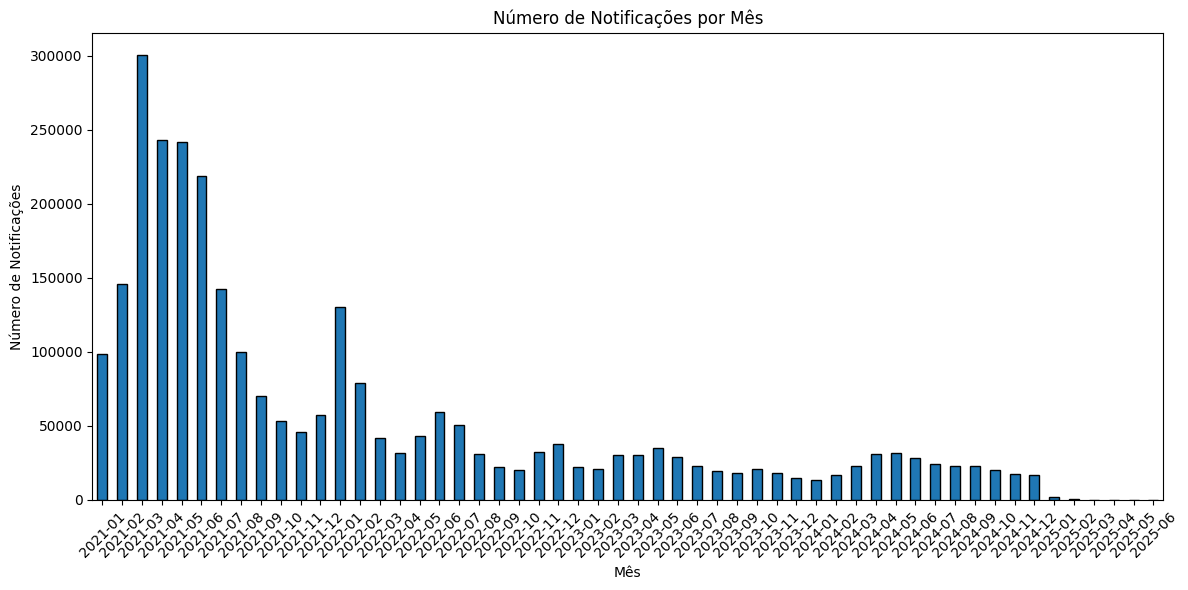

In [12]:
# Distribuição do número de notificações por mês
cleaned_df['month'] = cleaned_df['DT_NOTIFIC'].dt.to_period('M')
monthly_counts = cleaned_df['month'].value_counts().sort_index()

# Plotando a distribuição de notificações por mês
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', edgecolor='black')
plt.title('Número de Notificações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

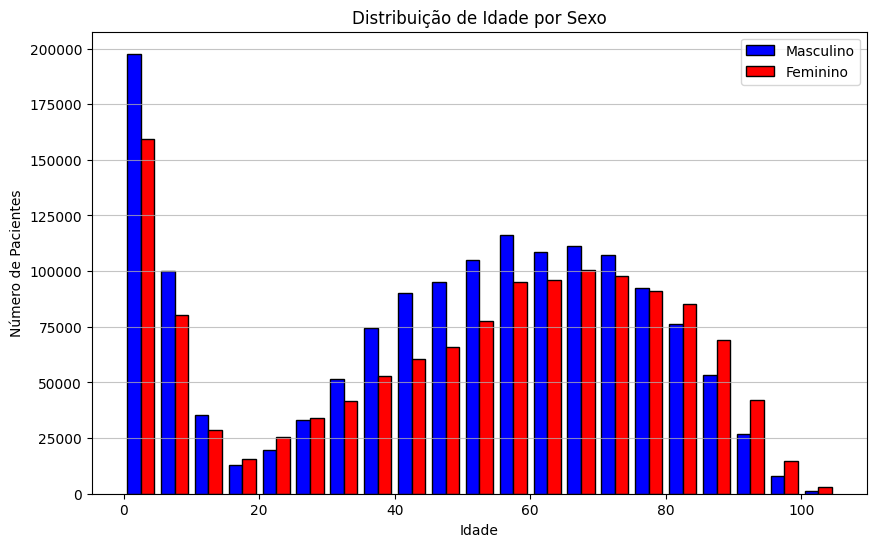

In [23]:
men = cleaned_df[cleaned_df['CS_SEXO'] == 'M']['NU_IDADE_N'].dropna()
women = cleaned_df[cleaned_df['CS_SEXO'] == 'F']['NU_IDADE_N'].dropna()

bins = range(0, 110, 5)  # Faixas de 5 em 5 anos

plt.figure(figsize=(10, 6))
plt.hist([men, women],
         bins=bins,
         label=['Masculino', 'Feminino'],
         color=['blue', 'red'],
         edgecolor='black',
         density=False,
         align='mid')
plt.title('Distribuição de Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

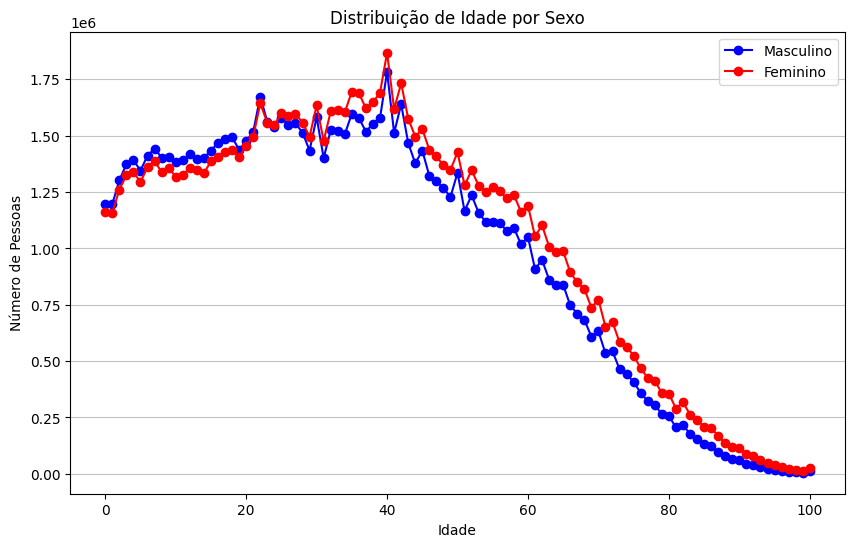

In [ ]:
# Comparando a distribuição de idade das notificações com a idade populacional
# Os dados populacionais forma obtidos do IBGE (https://sidra.ibge.gov.br/tabela/9606)
# A url com os parâmetros de query é esta: https://sidra.ibge.gov.br/tabela/9606#/n1/all/v/allxp/p/last%201/c86/95251/c2/all/c287/6557,6558,6559,6560,6561,6562,6563,6564,6565,6566,6567,6568,6569,6570,6571,6572,6573,6574,6575,6576,6577,6578,6579,6580,6581,6582,6583,6584,6585,6586,6587,6588,6589,6590,6591,6592,6593,6594,6595,6596,6597,6598,6599,6600,6601,6602,6603,6604,6605,6606,6607,6608,6609,6610,6611,6612,6613,6614,6615,6616,6617,6618,6619,6620,6621,6622,6623,6624,6625,6626,6627,6628,6629,6630,6631,6632,6633,6634,6635,6636,6637,6638,6639,6640,6641,6642,6643,6644,6645,6646,6647,6648,6649,6650,6651,6652,6653,6656,6657,6658,6659,100362/l/v,p+c86+c2,t+c287/resultado

populacao_df = pd.read_csv('dados/populacao_tabela9606_sexo.csv')
populacao_df

plt.figure(figsize=(10, 6))
plt.plot(populacao_df['Idade'], populacao_df['Homens'], label='Masculino', color='blue', marker='o')
plt.plot(populacao_df['Idade'], populacao_df['Mulheres'], label='Feminino', color='red', marker='o')
plt.title('Distribuição de Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

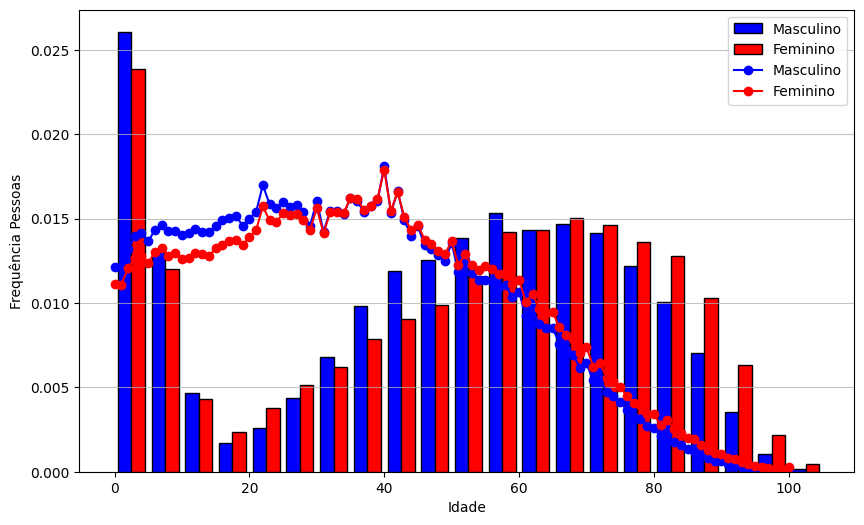

In [27]:
# Comparando a distribuição de idade das notificações com a idade populacional

bins = range(0, 110, 5)  # Faixas de 5 em 5 anos
plt.figure(figsize=(10, 6))
plt.hist([men, women],
         bins=bins,
         label=['Masculino', 'Feminino'],
         color=['blue', 'red'],
         edgecolor='black',
         density=True,
         align='mid')
plt.plot(populacao_df['Idade'], (populacao_df['Homens'] / populacao_df['Homens'].sum()), label='Masculino', color='blue', marker='o')
plt.plot(populacao_df['Idade'], (populacao_df['Mulheres'] / populacao_df['Mulheres'].sum()), label='Feminino', color='red', marker='o')
plt.xlabel('Idade')
plt.ylabel('Frequência Pessoas')
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()

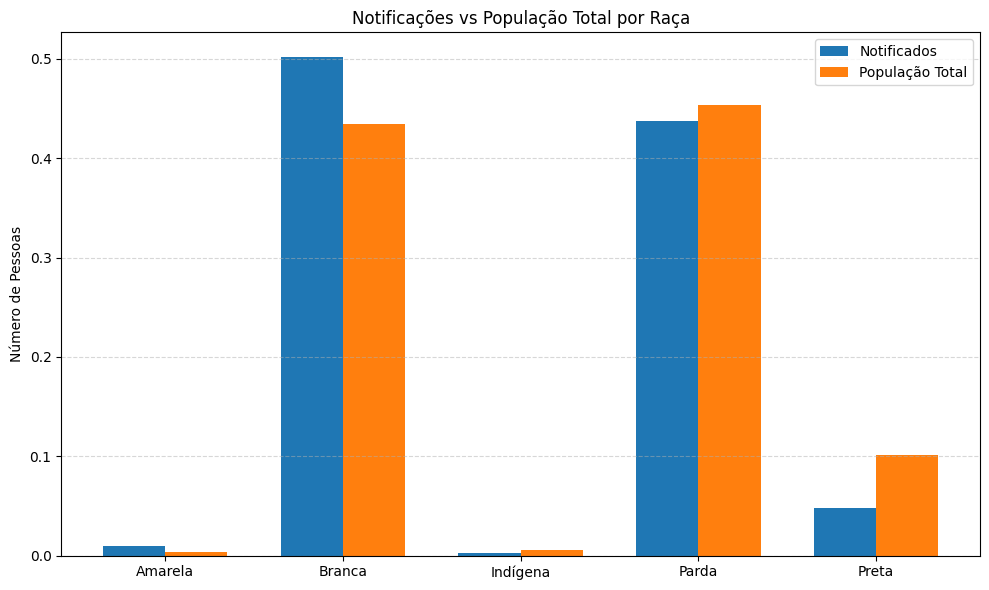

In [ ]:
# Distribuição dos dados por raça (notificações)
num_pessoas_por_raca = cleaned_df['CS_RACA'].value_counts()
raca_equivalentes = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}
num_pessoas_por_raca.index = num_pessoas_por_raca.index.map(raca_equivalentes)
num_pessoas_por_raca = num_pessoas_por_raca.drop('Ignorado')
num_pessoas_por_raca = num_pessoas_por_raca.sort_index()

# Dados populacionais de raça obtidos do IBGE
# https://sidra.ibge.gov.br/tabela/9606#/n1/all/v/allxp/p/last%201/c86/allxt/c2/6794/c287/100362/l/v,p+c86+c2,t+c287/resultado
populacao_raca_df = pd.read_csv('dados/populacao_raca_tabela9606.csv')
populacao_raca_df = populacao_raca_df.sort_values(by='Raca')

# Garantir que ambas as listas estejam na mesma ordem
racas = ['Amarela', 'Branca', 'Indígena', 'Parda', 'Preta']
notificados = num_pessoas_por_raca.reindex(racas)
populacao_total = populacao_raca_df.set_index('Raca').loc[racas, 'Total']

# Plotando o gráfico de barras lado a lado
x = range(len(racas))
largura = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - largura/2 for i in x], notificados / notificados.sum(), width=largura, label='Notificados')
plt.bar([i + largura/2 for i in x], populacao_total / populacao_total.sum(), width=largura, label='População Total')
plt.xticks(ticks=x, labels=racas)
plt.ylabel('Número de Pessoas')
plt.title('Notificações vs População Total por Raça')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

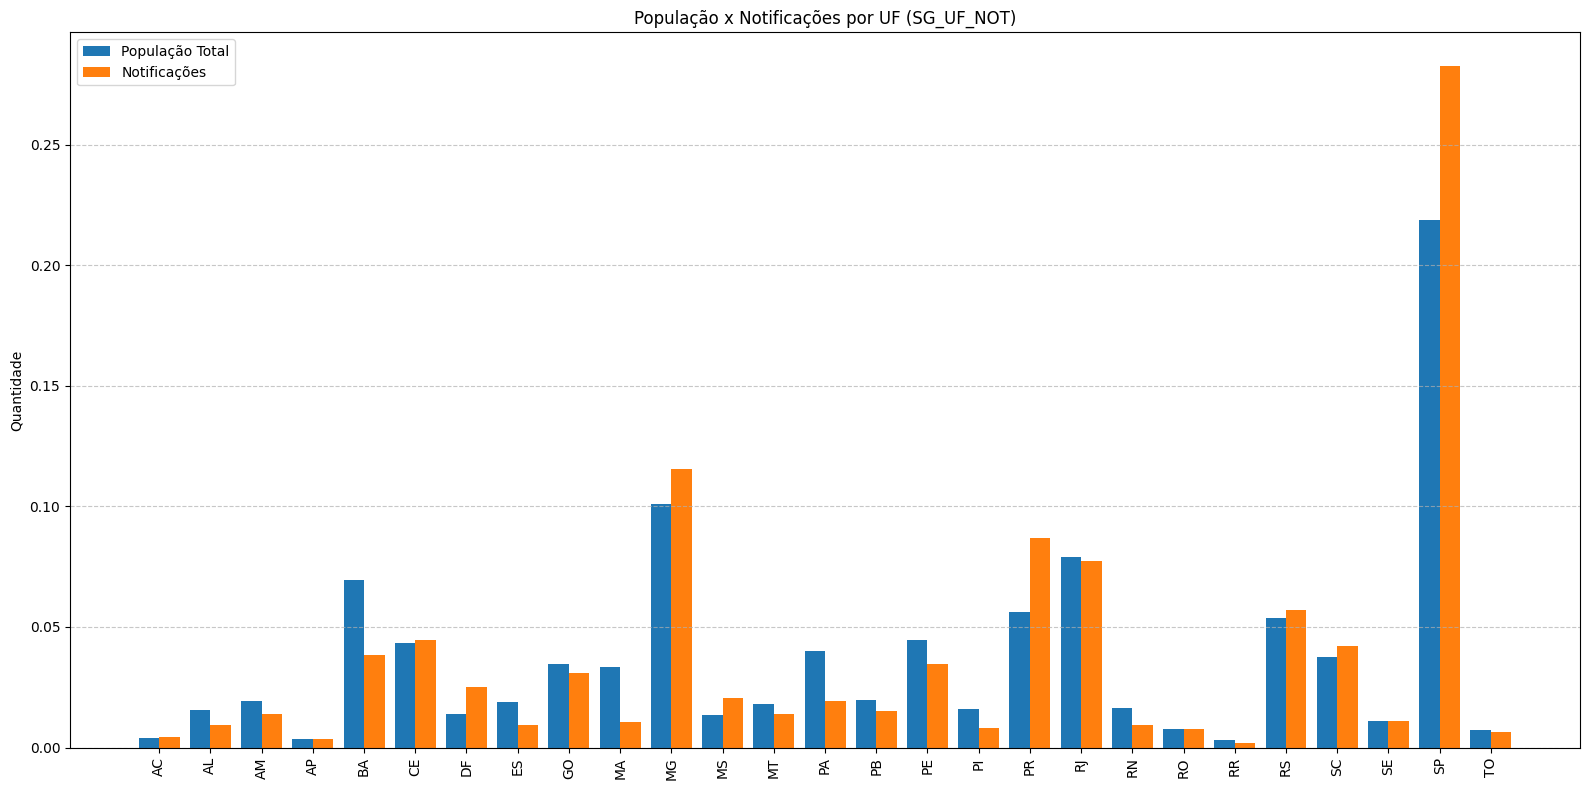

In [124]:
# Distribuição dos dados por UF/Região usando o estado da notificação
uf_df = cleaned_df['SG_UF_NOT'].value_counts().sort_index().copy()

# Dados populacionais obtidos do IBGE
# https://sidra.ibge.gov.br/tabela/9606#/n3/all/v/allxp/p/last%201/c86/95251/c2/6794/c287/100362/l/,t+p+c86+c2,c287+v/resultado
populacao_uf_df = pd.read_csv('dados/populacao_ufs_tabela9606.csv', header=None)
populacao_uf_df = populacao_uf_df.T
populacao_uf_df.columns = ['UF', 'Total']
populacao_uf_df = populacao_uf_df.drop(index=0)

# Mapeamento de nomes por extenso para siglas
nome_para_sigla = {
    'Rondônia': 'RO', 'Acre': 'AC', 'Amazonas': 'AM', 'Roraima': 'RR',
    'Pará': 'PA', 'Amapá': 'AP', 'Tocantins': 'TO', 'Maranhão': 'MA',
    'Piauí': 'PI', 'Ceará': 'CE', 'Rio Grande do Norte': 'RN', 'Paraíba': 'PB',
    'Pernambuco': 'PE', 'Alagoas': 'AL', 'Sergipe': 'SE', 'Bahia': 'BA',
    'Minas Gerais': 'MG', 'Espírito Santo': 'ES', 'Rio de Janeiro': 'RJ',
    'São Paulo': 'SP', 'Paraná': 'PR', 'Santa Catarina': 'SC', 'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Goiás': 'GO', 'Distrito Federal': 'DF'
}

# Remover possíveis espaços em branco
populacao_uf_df['UF'] = populacao_uf_df['UF'].str.strip()

# Adiciona a coluna com sigla
populacao_uf_df['UF_sigla'] = populacao_uf_df['UF'].map(nome_para_sigla)

# Converte a coluna 'Total' para inteiro
populacao_uf_df['Total'] = populacao_uf_df['Total'].astype(int)

# Transformar a Series de notificações em DataFrame
notificacoes_df = uf_df.reset_index()
notificacoes_df.columns = ['UF_sigla', 'Notificações']

# Merge: população + notificações
merged_df = pd.merge(populacao_uf_df, notificacoes_df, on='UF_sigla')

# Ordena por UF_sigla para manter coerência visual
merged_df = merged_df.sort_values('UF_sigla')

# Plot
x = np.arange(len(merged_df))
largura = 0.4

plt.figure(figsize=(16, 8))
plt.bar(x - largura/2, merged_df['Total'] / merged_df['Total'].sum(), width=largura, label='População Total')
plt.bar(x + largura/2, merged_df['Notificações'] / merged_df['Notificações'].sum(), width=largura, label='Notificações')

plt.xticks(x, merged_df['UF_sigla'], rotation=90)
plt.ylabel('Quantidade')
plt.title('População x Notificações por UF (SG_UF_NOT)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
